# Ziggy tutorial

The smile effect works with wav/aif mono files. It won't work with mp3s.

In [1]:
%load_ext autoreload
%autoreload 2

# Here is an example of transforamtion of the smile algorithm
from one_way_smile_algorithm.one_way_smile_algorithm import transform_to_smile
import IPython

pyo version 0.8.7 (uses single precision)


In [2]:
#define the name of the sound to transoform
example_sound = "sounds/F11a1.wav" # this is the path to the sound you want to transform

In [3]:
#transform the sound to mono
from transform_audio import wav_to_mono
wav_to_mono(example_sound, example_sound)

In [4]:
target_name = "sounds/test.wav" #this is the name of the file that will be transformed
transform_to_smile(audio_file= example_sound , target_file = target_name)

Offline Server rendering file sounds/test.wav dur=1.857596
Offline Server rendering finished.


This command should create a new transformation.
You should see this new file called as "target name".

The smile effect is piloted via an alpha parameter.


When $\alpha=1$ the algorithm doesn't do any transformation.
When $\alpha<1$ the algorithm decreases the impression of a smile.
When $\alpha>1$ the algorithm increases the impression of a smile.


For speech, $\alpha$ should vary between [0.8 and 1.25]

So lets make this parameter vary to change the transformation:
    
    

In [5]:
help(transform_to_smile) # check the parameters of the smile algorithm

Help on function transform_to_smile in module one_way_smile_algorithm.one_way_smile_algorithm:

transform_to_smile(audio_file, target_file, alpha=1.25, feature_window=10, harmonicity_threshold=0.8, plot_features_pdf=False, delete_warp_file=True, formant_estimation='lpc', do_dynamic_filter=True, freq_warp_ws=512, lpc_order=25, warp_method='lpc', freq_warp_oversampling=64)
    Transforms a mono file using the smile algorithm
    parameters:
        audio_file             : audio_file to transform
        target_file            : target audio file to create
        alpha                  : alpha parameter which controls both the amount of shift and of gain boost, alpha = 1.25 is equivalent to the smile algorithm, alpha = 0.8 is the pursed transofrmation
        feature_window         : how many samples to mean formant frequencies over time
        harmonicity_threshold  : what harmonicity threshold to take to consider when the signal is harmonic
        formant_estimation     : can be eit

In [6]:
#While you execute these commands, check your terminal python to see if there are no errors.
transform_to_smile(audio_file= example_sound, target_file="sounds/unsmile_version.wav", alpha=0.85) #create unsmile transformation
transform_to_smile(audio_file= example_sound, target_file="sounds/smile_version.wav", alpha=1.25) #create smile transformation

Offline Server rendering file sounds/unsmile_version.wav dur=1.857596
Offline Server rendering finished.
Offline Server rendering file sounds/smile_version.wav dur=1.857596
Offline Server rendering finished.


In [7]:
IPython.display.Audio("sounds/unsmile_version.wav")

In [8]:
IPython.display.Audio("sounds/smile_version.wav")

# Dynamic Transformations

Let's now make a dynamic transformation over time. For instance, let's do a linear transformation from 0.8 to 1.25 through the sound.

In [2]:
#First, we have the sound
source = "sounds/F1_1_an.wav"
IPython.display.Audio(source)

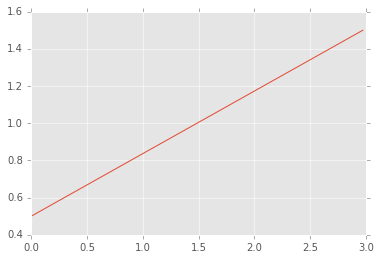

In [3]:
#The parameter alpha can now be a two dimensional array with [Time (in seconds), alpha values] in it.
#Let's build that two dimensional array.
#We want at the point 0 an alpha of 0.8, and at the end of the sound an alpha of 1.25.
#Thus the array is

from audio_analysis import get_sound_duration
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

duration = get_sound_duration(source)
time = np.linspace(0, duration, 1000)
alphas = np.linspace(0.5, 1.5, 1000)
plt.plot(time, alphas); # plot the automation curve

In [4]:
#now transform
target = "sounds/dynamic_transform.wav"
transform_to_smile(audio_file= source
                   , target_file=target
                   , alpha=[time, alphas]
                  ) #create dynamic smile transformation

Offline Server rendering file sounds/dynamic_transform.wav dur=2.972154
Offline Server rendering finished.


In [5]:
IPython.display.Audio(target)

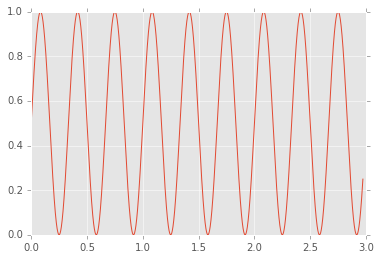

In [21]:
# now something a little more crazy
nb_points = 1000
freq = 3
t    = np.linspace(0, duration , duration * 1000, endpoint=True)
sin_wave = (np.sin(2*np.pi*freq*t) + 1) / 2
plt.plot(t, sin_wave); # plot the automation curve

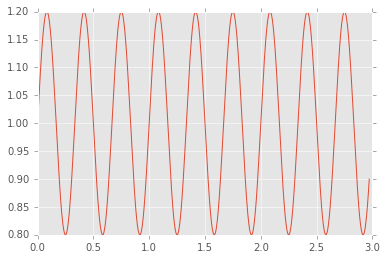

In [22]:
r1 = 0.8
r2 = 1.2

sin_wave = (sin_wave*(r2-r1)) + r1 #renormalize y axis

plt.plot(t,sin_wave)

In [23]:
transform_to_smile(audio_file= source
                   , target_file=target
                   , alpha=[t, sin_wave]
                  ) #create dynamic smile transformation

Offline Server rendering file sounds/dynamic_transform.wav dur=2.972154
Offline Server rendering finished.


In [24]:
IPython.display.Audio(target)

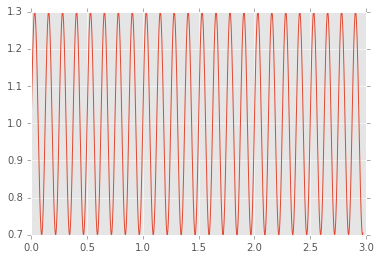

In [26]:
# now with a mich higher frquency!
from signal_generator import sin

#init variables
nb_points = 1000
freq      = 8
r1        = 0.7
r2        = 1.3
target = "sounds/high_freq_mod.wav"

#create time and modulator
t    = np.linspace(0, duration , duration * 1000, endpoint=True)
sin_wave = (np.sin(2*np.pi*freq*t) + 1) / 2
sin_wave = (sin_wave*(r2-r1)) + r1 #renormalize y axis

#plot modulator
plt.plot(t, sin_wave)

In [27]:
#tranform to smile
transform_to_smile(audio_file= source
                   , target_file=target
                   , alpha=[t, sin_wave]
                  ) #create dynamic smile transformation

IPython.display.Audio(target)

Offline Server rendering file sounds/high_freq_mod.wav dur=2.972154
Offline Server rendering finished.


In [ ]:
# now with a mich higher frquency!
from signal_generator import sin

#init variables
nb_points = 1000
freq      = 6
r1        = 0.6
r2        = 1.4
target = "sounds/high_freq_mod.wav"

#create time and modulator
t    = np.linspace(0, duration , duration * 1000, endpoint=True)
sin_wave = (np.sin(2*np.pi*freq*t) + 1) / 2
sin_wave = (sin_wave*(r2-r1)) + r1 #renormalize y axis

#plot modulator
plt.plot(t, sin_wave)

#tranform to smile
transform_to_smile(audio_file= source
                   , target_file=target
                   , alpha=[t, sin_wave]
                  ) #create dynamic smile transformation

IPython.display.Audio(target)